1.	The necessary libraries are imported.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import MinMaxScaler

2.	The dataset is loaded from the CSV file using the pandas library. 

In [6]:
df = pd.read_csv('water_consumption/water.csv')

In [7]:
df.head()

,Datetime,Consumption
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [8]:
df.tail()

,Datetime,Consumption
131465,2016-01-01 20:00:00,32530.0
131466,2016-01-01 21:00:00,32131.0
131467,2016-01-01 22:00:00,31318.0
131468,2016-01-01 23:00:00,29930.0
131469,2016-01-02 00:00:00,28315.0


In [9]:
df['Datetime']

0         2002-12-31 01:00:00
1         2002-12-31 02:00:00
2         2002-12-31 03:00:00
3         2002-12-31 04:00:00
4         2002-12-31 05:00:00
                 ...         
131465    2016-01-01 20:00:00
131466    2016-01-01 21:00:00
131467    2016-01-01 22:00:00
131468    2016-01-01 23:00:00
131469    2016-01-02 00:00:00
Name: Datetime, Length: 131470, dtype: object

3.	The 'Datetime' column is converted to a datetime format.

In [10]:
# Convert the datetimes from the csv from object type to Datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df['Datetime']

0        2002-12-31 01:00:00
1        2002-12-31 02:00:00
2        2002-12-31 03:00:00
3        2002-12-31 04:00:00
4        2002-12-31 05:00:00
                 ...        
131465   2016-01-01 20:00:00
131466   2016-01-01 21:00:00
131467   2016-01-01 22:00:00
131468   2016-01-01 23:00:00
131469   2016-01-02 00:00:00
Name: Datetime, Length: 131470, dtype: datetime64[ns]

In [12]:
df['Consumption']

0         26498.0
1         25147.0
2         24574.0
3         24393.0
4         24860.0
           ...   
131465    32530.0
131466    32131.0
131467    31318.0
131468    29930.0
131469    28315.0
Name: Consumption, Length: 131470, dtype: float64

4.	The daily consumption data is plotted using matplotlib. This provides an initial visualization of the data.

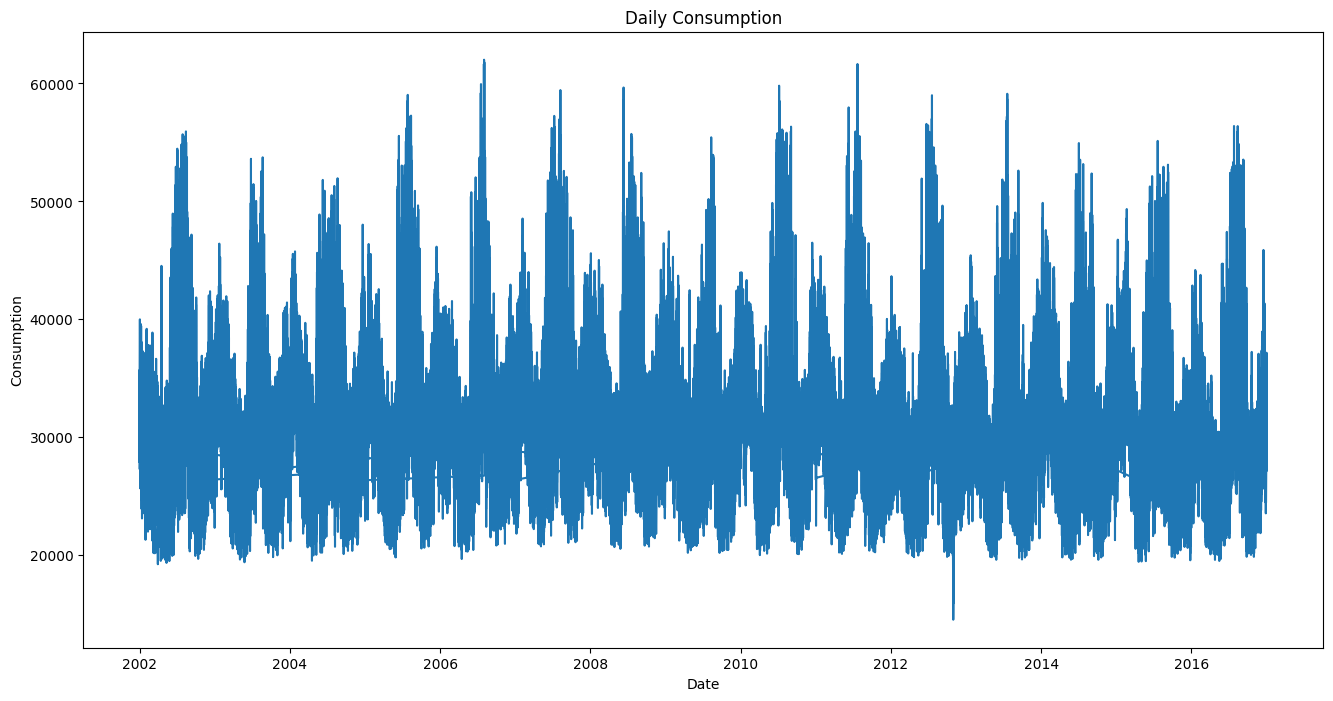

In [13]:
# Original plot of the water consumption
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df['Datetime'], df['Consumption'])
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Daily Consumption')
plt.show()

5.	The consumption data is normalized using MinMaxScaler. This is done to ensure that all features are on the same scale.

In [14]:
# Normalize the data
scaler = MinMaxScaler()
df['Consumption'] = scaler.fit_transform(df['Consumption'].values.reshape(-1, 1))

In [15]:
df['Datetime']

0        2002-12-31 01:00:00
1        2002-12-31 02:00:00
2        2002-12-31 03:00:00
3        2002-12-31 04:00:00
4        2002-12-31 05:00:00
                 ...        
131465   2016-01-01 20:00:00
131466   2016-01-01 21:00:00
131467   2016-01-01 22:00:00
131468   2016-01-01 23:00:00
131469   2016-01-02 00:00:00
Name: Datetime, Length: 131470, dtype: datetime64[ns]

6.	The normalized daily consumption data is plotted to see how it looks after normalization.

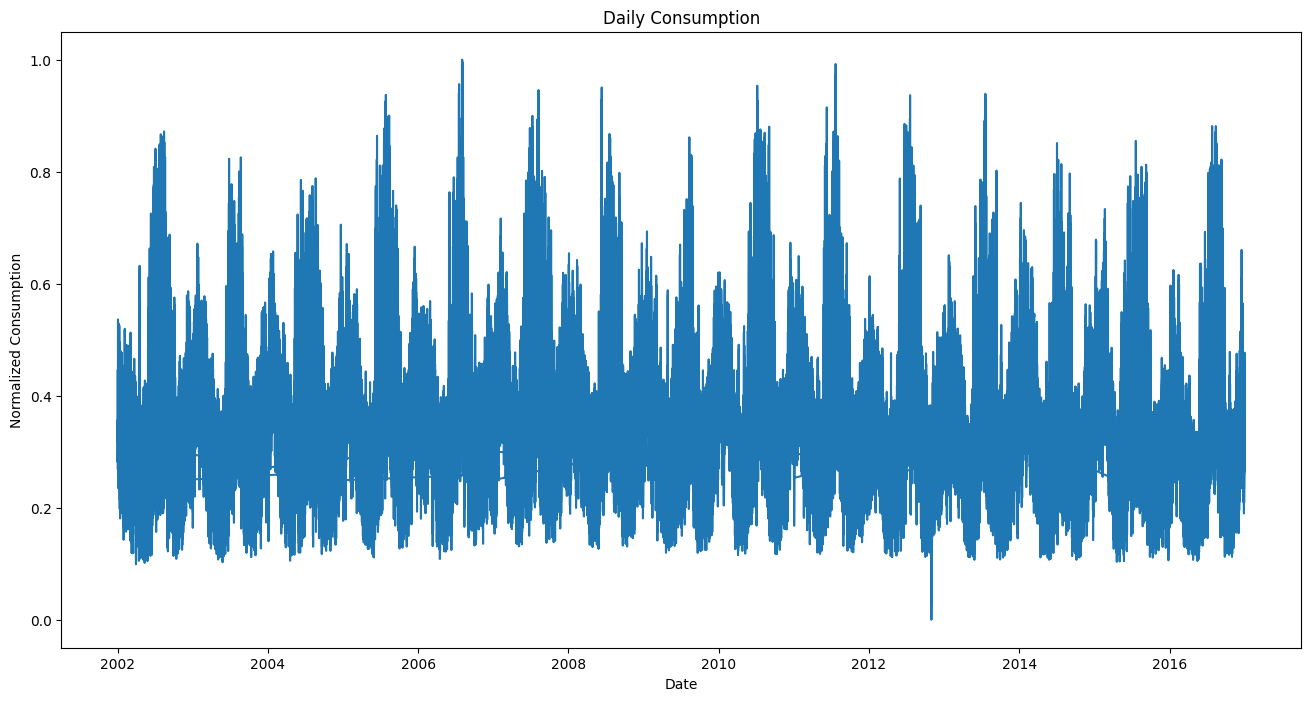

In [16]:
# Plot of the normalized daily consumption
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df['Datetime'], df['Consumption'])
plt.xlabel('Date')
plt.ylabel('Normalized Consumption')
plt.title('Daily Consumption')
plt.show()

7.	The dataset is split into training and validation sets. First 80% of the data is used for training, and the rest 20% is used for validation.

In [17]:
# Set a split point in the data
data_length = int(0.8 * len(df))

In [18]:
# Set the train set to be up to 80% of the data
train_set = df[:data_length]

In [19]:
# Set the validation set to be the rest 20% of the data
validation_set = df[data_length:]

In [20]:
train_set

,Datetime,Consumption
0,2002-12-31 01:00:00,0.251849
1,2002-12-31 02:00:00,0.223386
2,2002-12-31 03:00:00,0.211314
3,2002-12-31 04:00:00,0.207500
4,2002-12-31 05:00:00,0.217339
...,...,...
105171,2014-12-31 05:00:00,0.334604
105172,2014-12-31 06:00:00,0.370863
105173,2014-12-31 07:00:00,0.422817
105174,2014-12-31 08:00:00,0.451470


In [21]:
validation_set

,Datetime,Consumption
105176,2014-12-31 10:00:00,0.451996
105177,2014-12-31 11:00:00,0.443969
105178,2014-12-31 12:00:00,0.432908
105179,2014-12-31 13:00:00,0.418919
105180,2014-12-31 14:00:00,0.408743
...,...,...
131465,2016-01-01 20:00:00,0.378932
131466,2016-01-01 21:00:00,0.370526
131467,2016-01-01 22:00:00,0.353397
131468,2016-01-01 23:00:00,0.324155


8.	A sequential neural network model is defined using Keras. The model consists of 3 dense layers with ReLU activation and dropout layers for regularization, followed by a final output layer with a single neuron.

In [22]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [27]:
# Define the model architecture, with a few Dense and Dropout layers
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(1,)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


9.	The model is compiled with the Adam optimizer, mean squared error loss function, and a set of metrics (MAE, MAPE and RMSE) to track during training. The model is trained on the training set for n epochs, with a batch size, and validation data is used to monitor the training process. The validation metrics (MAE, MAPE, and RMSE) are retrieved from the history object returned by the training process.

In [29]:
# Compile the model with adam optimizer, have the mean squared error as the loss parameter and use the RMSE, MAPE and MAE as the model's metrics for evaluating the accuracy of the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])

# Model fitting
history = model.fit(train_set['Consumption'], train_set['Consumption'], epochs=10, validation_data=(validation_set['Consumption'], validation_set['Consumption']), batch_size=64)

val_mae = history.history['val_mean_absolute_error'] # retrieve the validation MAE at each epoch
val_mape = history.history['val_mean_absolute_percentage_error'] # retrieve the validation MAPE at each epoch
val_rmse = history.history['val_root_mean_squared_error'] # retrieve the validation RMSE at each epoch


Epoch 1/10
1644/1644 [==============================] - 6s 3ms/step - loss: 0.0061 - root_mean_squared_error: 0.0779 - mean_absolute_percentage_error: 605.0667 - mean_absolute_error: 0.0479 - val_loss: 1.9131e-04 - val_root_mean_squared_error: 0.0138 - val_mean_absolute_percentage_error: 4.0967 - val_mean_absolute_error: 0.0110
Epoch 2/10
1644/1644 [==============================] - 3s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - mean_absolute_percentage_error: 2024.5081 - mean_absolute_error: 0.0249 - val_loss: 3.7083e-04 - val_root_mean_squared_error: 0.0193 - val_mean_absolute_percentage_error: 4.8562 - val_mean_absolute_error: 0.0097
Epoch 3/10
1644/1644 [==============================] - 4s 3ms/step - loss: 0.0013 - root_mean_squared_error: 0.0359 - mean_absolute_percentage_error: 2024.0731 - mean_absolute_error: 0.0247 - val_loss: 3.5823e-04 - val_root_mean_squared_error: 0.0189 - val_mean_absolute_percentage_error: 4.9750 - val_mean_absolute_error: 0.0106
Epoch 4/

10.	The training and validation losses are plotted to visualize the training process, along with the training and validation accuracy metrics by the MAE, MAPE and RMSE.

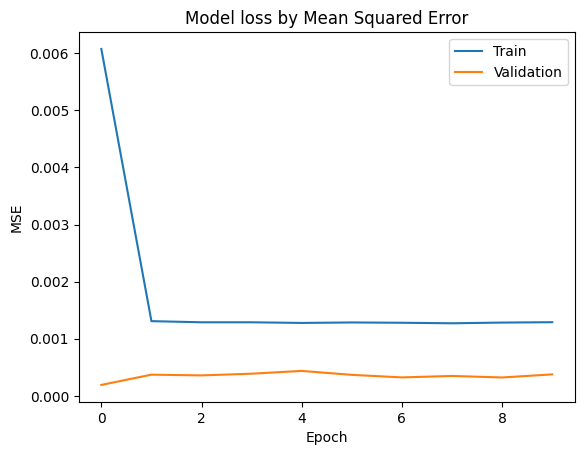

In [30]:
# Plot the training and validation losses over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

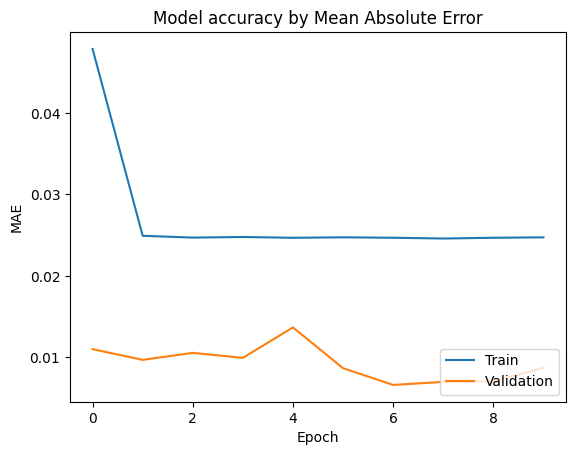

In [31]:
# Plot the training and validation MAE over epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model accuracy by Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

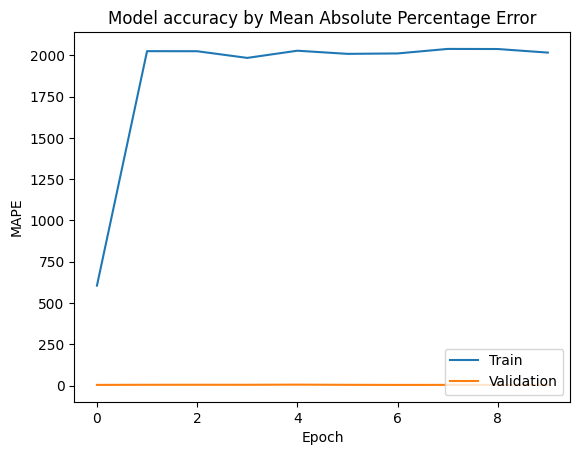

In [32]:
# Plot the training and validation MAPE over epochs
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model accuracy by Mean Absolute Percentage Error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

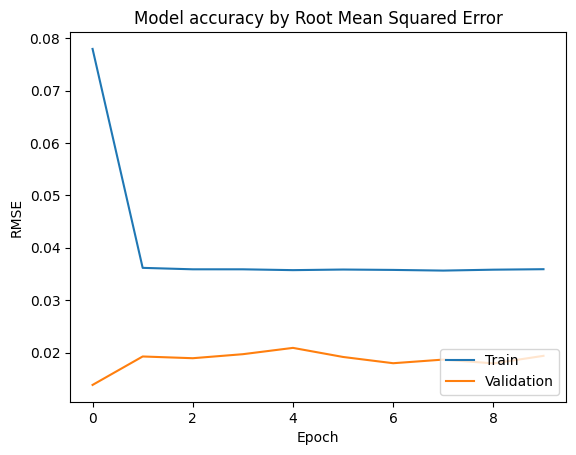

In [33]:
# Plot the training and validation RMSE over epochs
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model accuracy by Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

11.	The model is evaluated on the validation set, the predicted values are generated and the evaluation metrics (MAE, MSE, MAPE, and RMSE) are extracted for the prediction values on the validation values.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [35]:
# Evaluate the model on the validation set
y_true = validation_set['Consumption']
y_pred = model.predict(validation_set['Consumption'])
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

822/822 [==============================] - 2s 2ms/step
MAE: 0.0087, MSE: 0.0004, MAPE: 0.0463, RMSE: 0.0194


In [36]:
loss = model.evaluate(validation_set['Consumption'], validation_set['Consumption'])

822/822 [==============================] - 2s 2ms/step - loss: 3.7559e-04 - root_mean_squared_error: 0.0194 - mean_absolute_percentage_error: 4.6312 - mean_absolute_error: 0.0087


12.	The actual consumption data and predicted consumption data are plotted on the validation set to compare the two.

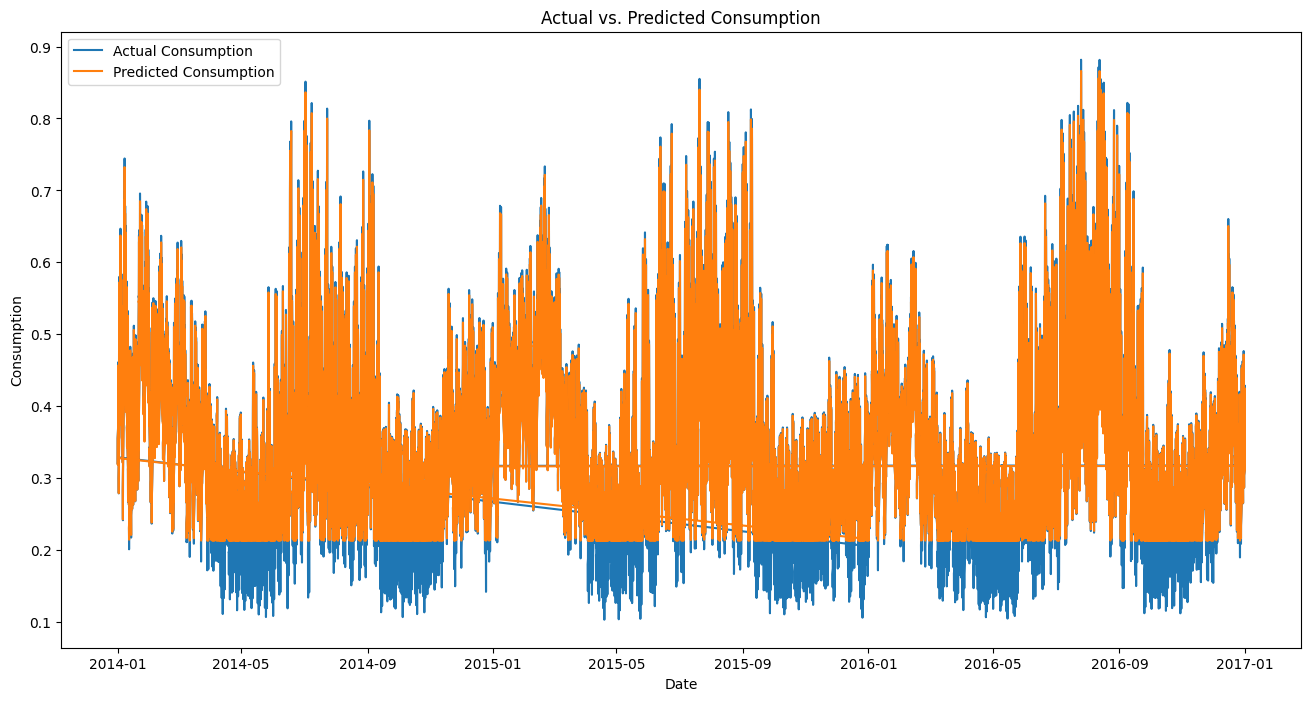

In [37]:
# plot of the actual consumption and predicted consumption
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(validation_set['Datetime'], validation_set['Consumption'], label='Actual Consumption')
plt.plot(validation_set['Datetime'], y_pred, label='Predicted Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Actual vs. Predicted Consumption')
plt.legend()
plt.show()

13.	Daily and weekly predictions are generated for future time periods up to 2 years. 

In [38]:
# Generate daily and weekly predictions
n_steps_in = 728
n_periods = 728
last_date = df['Datetime'].max()
forecast_dates_daily = pd.date_range(last_date, periods=n_periods+1, freq='D')[1:]
forecast_dates_weekly = pd.date_range(last_date, periods=(n_periods+7)/7, freq='W')[1:]
print(len(forecast_dates_daily))
print(len(forecast_dates_weekly))


728
104


14.	The input data is prepared for the model to generate predictions.

In [39]:
# Prepare the input data for the model
input_data = validation_set['Consumption'].values.reshape(-1,1)
print(len(input_data))

26294


15.	Predictions are generated for the future time periods.

In [40]:
# Generate predictions for the future time periods
y_pred = model.predict(input_data[-n_steps_in:], batch_size=32)
forecastD = scaler.inverse_transform(y_pred)[-n_periods:]
forecastW = forecastD.reshape(-1, 7).mean(axis=1)
print(len(forecastD))
print(len(forecastW))

23/23 [==============================] - 0s 1ms/step
728
104


16.	The predicted consumption data is inverse transformed to get the actual consumption data.

In [41]:
# Prepare input data for weekly predictions
input_data_weekly = forecastW[-n_periods:].reshape(-1, 1)
print(len(input_data_weekly))

104


17.	Weekly predictions are generated by taking the mean of the daily predictions over each week.

In [42]:
# Generate weekly predictions
y_pred_weekly = model.predict(input_data_weekly, batch_size=32)
forecast_weekly = scaler.inverse_transform(y_pred_weekly)
print(len(y_pred_weekly))
print(len(forecast_weekly))

4/4 [==============================] - 0s 0s/step
104
104


In [43]:
# Create DataFrames with the predictions and the forecast dates
forecast_df_daily = pd.DataFrame({'Datetime': forecast_dates_daily, 'Consumption': forecastD.flatten()})
print(len(forecast_df_daily))
forecast_df_weekly = pd.DataFrame({'Datetime': forecast_dates_weekly, 'Consumption': forecast_weekly.flatten()})
print(len(forecast_df_weekly))

728
104


In [44]:
forecast_df_daily

,Datetime,Consumption
0,2017-01-01 23:00:00,28005.302734
1,2017-01-02 23:00:00,30423.802734
2,2017-01-03 23:00:00,31750.863281
3,2017-01-04 23:00:00,31623.318359
4,2017-01-05 23:00:00,31018.693359
...,...,...
723,2018-12-25 23:00:00,32417.800781
724,2018-12-26 23:00:00,32029.322266
725,2018-12-27 23:00:00,31237.761719
726,2018-12-28 23:00:00,29886.357422


In [45]:
forecast_df_weekly

,Datetime,Consumption
0,2017-01-08 23:00:00,1.204735e+09
1,2017-01-15 23:00:00,1.179591e+09
2,2017-01-22 23:00:00,1.306366e+09
3,2017-01-29 23:00:00,1.251796e+09
4,2017-02-05 23:00:00,1.205927e+09
...,...,...
99,2018-12-02 23:00:00,1.213948e+09
100,2018-12-09 23:00:00,1.137662e+09
101,2018-12-16 23:00:00,1.018496e+09
102,2018-12-23 23:00:00,1.161176e+09


18.	The daily and weekly predictions are plotted to visualize the predicted consumption over time.

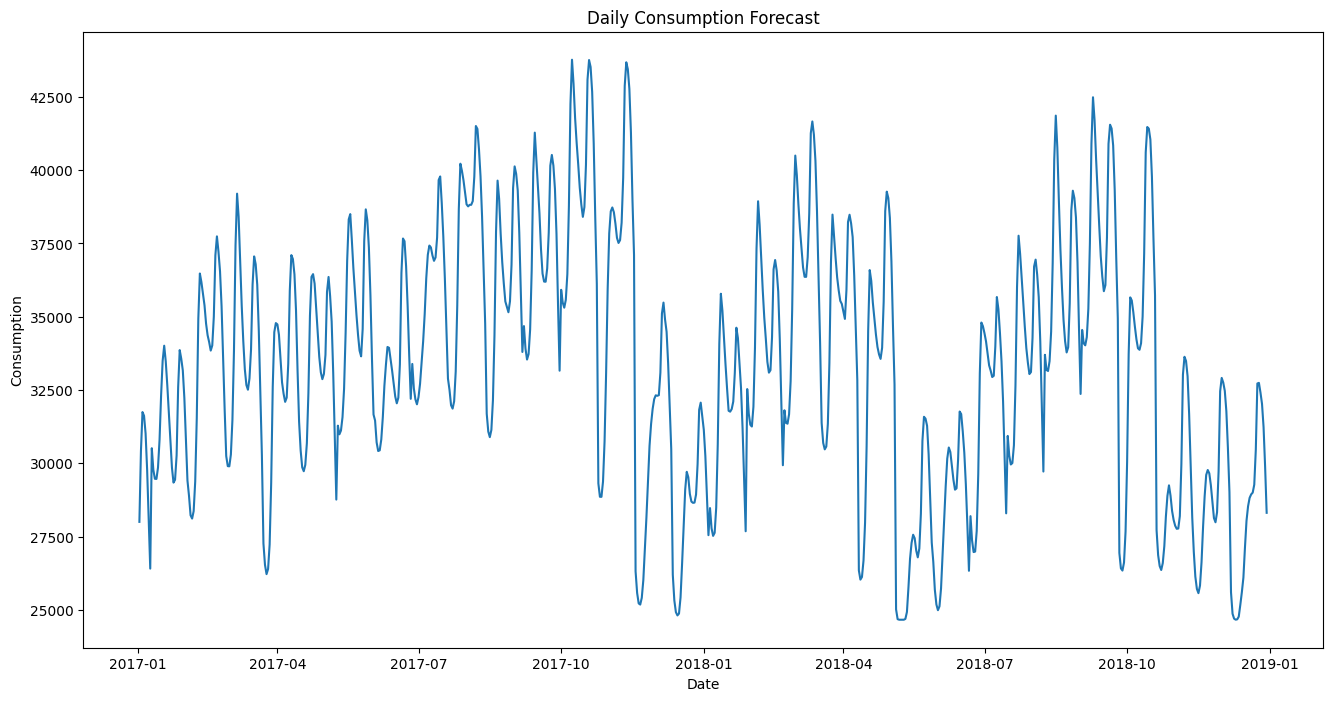

In [46]:
# Plot of the daily consumption forecast
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(forecast_df_daily['Datetime'], forecast_df_daily['Consumption'])
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Daily Consumption Forecast')
plt.show()

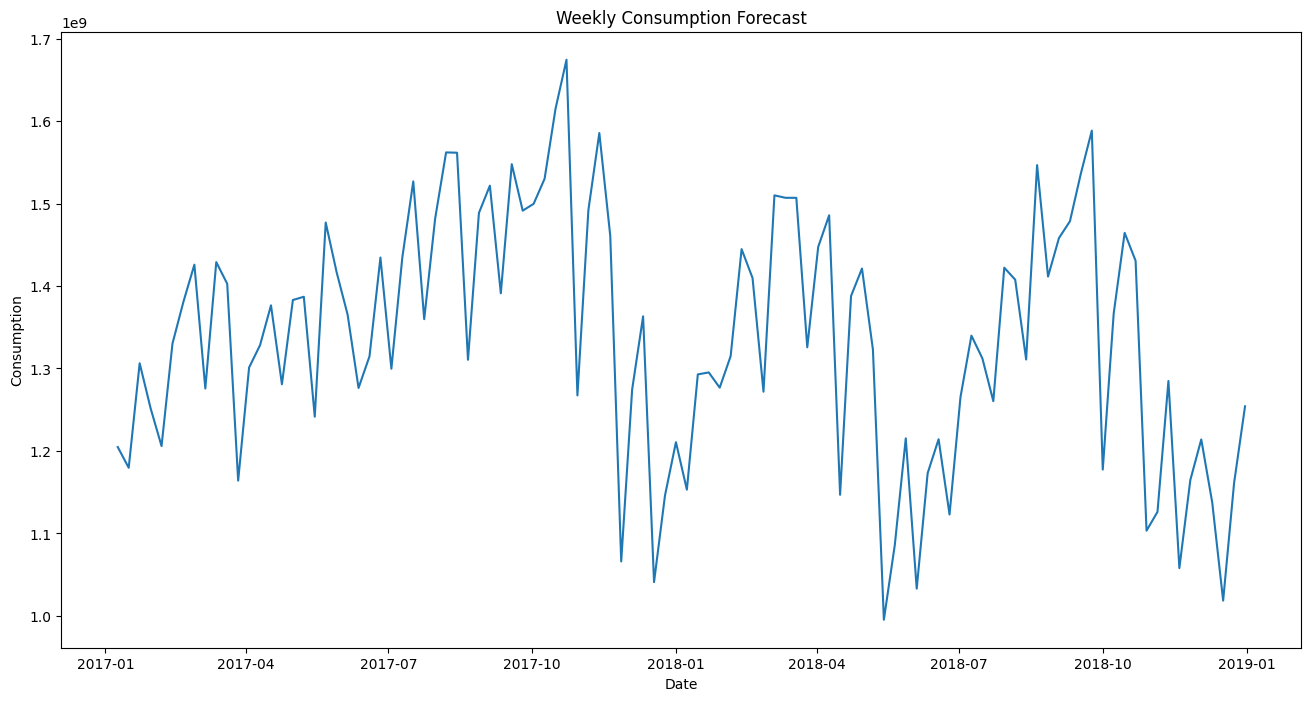

In [47]:

# Plot of the weekly consumption forecast
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(forecast_df_weekly['Datetime'], forecast_df_weekly['Consumption'])
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Weekly Consumption Forecast')
plt.show()